# ***Аналитика новостного сайта The New York Times***

In [4]:
#from datetime import date
from datetime import datetime
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

def CheckDuplicates(df, column_name): #Функция, которая ищет и удаляет строки-дубликаты
    if any(df[column_name].duplicated()) == True: #Проверяем есть ли строки-дубликаты
        return df.drop_duplicates(column_name) #Если есть - удаляем
    else: return df

### **Создадим датафреймы для 3 основных секций:**

In [5]:
#Делаю датафрейм для секции world
with open('world1.json') as f:     #Откроем первую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_wd1 = pd.DataFrame(data)
df_wd1['Date'] = pd.to_datetime(df_wd1['Date'], format="%Y/%m/%d")

with open('world2.json') as f:     #Откроем вторую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_wd2 = pd.DataFrame(data)
df_wd2['Date'] = pd.to_datetime(df_wd2['Date'], format="%Y/%m/%d")

with open('world3.json') as f:     #Откроем третью часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_wd3 = pd.DataFrame(data)
df_wd3['Date'] = pd.to_datetime(df_wd3['Date'], format="%Y/%m/%d")

with open('world4.json') as f:     #Откроем четвёртую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_wd4 = pd.DataFrame(data)
df_wd4['Date'] = pd.to_datetime(df_wd4['Date'], format="%Y/%m/%d")

df_world = df_wd1.append([df_wd2, df_wd3, df_wd4], sort = False)     #Объединим все датафреймы в общий
df_world = CheckDuplicates(df_world, 'Title')     #Найдём и удалим все строки-дубликаты
df_world = df_world.query("'2022-02-01' <= Date <= '2022-05-31'")

# Делаю датафрейм для секции U.S.
with open('us1.json') as f:     #Откроем первую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_us1 = pd.DataFrame(data)
df_us1['Date'] = pd.to_datetime(df_us1['Date'], format="%Y/%m/%d")

with open('us2.json') as f:     #Откроем вторую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_us2 = pd.DataFrame(data)
df_us2['Date'] = pd.to_datetime(df_us2['Date'], format="%Y/%m/%d")

with open('us3.json') as f:     #Откроем третью часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_us3 = pd.DataFrame(data)
df_us3['Date'] = pd.to_datetime(df_us3['Date'], format="%Y/%m/%d")

with open('us4.json') as f:     #Откроем четвёртую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_us4 = pd.DataFrame(data)
df_us4['Date'] = pd.to_datetime(df_us4['Date'], format="%Y/%m/%d")

df_us = df_us1.append([df_us2, df_us3, df_us4], sort = False)     #Объединим все датафреймы в общий
df_us = CheckDuplicates(df_us, 'Title')     #Найдём и удалим все строки-дубликаты
df_us = df_us.query("'2022-02-01' <= Date <= '2022-05-31'")

# Делаю датафрейм для секции SPORTS
with open('sport1.json') as f:     #Откроем первую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_sport1 = pd.DataFrame(data)
df_sport1['Date'] = pd.to_datetime(df_sport1['Date'], format="%Y/%m/%d")

with open('sport2.json') as f:     #Откроем вторую часть данных и запишем их в датафрейм
    data = json.load(f)
    
df_sport2 = pd.DataFrame(data)
df_sport2['Date'] = pd.to_datetime(df_sport2['Date'], format="%Y/%m/%d")

df_sports = df_sport1.append([df_sport2], sort = False)     #Объединим все датафреймы в общий
df_sports = CheckDuplicates(df_sports, 'Title')     #Найдём и удалим все строки-дубликаты
df_sports = df_sports.query("'2022-02-01' <= Date <= '2022-05-31'")

C:\Users\solntsev\AppData\Local\Temp\ipykernel_12088\3832340191.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_world = df_wd1.append([df_wd2, df_wd3, df_wd4], sort = False)     #Объединим все датафреймы в общий
C:\Users\solntsev\AppData\Local\Temp\ipykernel_12088\3832340191.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_us = df_us1.append([df_us2, df_us3, df_us4], sort = False)     #Объединим все датафреймы в общий
C:\Users\solntsev\AppData\Local\Temp\ipykernel_12088\3832340191.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sports = df_sport1.append([df_sport2], sort = False)     #Объединим все датафреймы в общий


### **Посмотрим количество всех публикаций:**

C:\Users\solntsev\AppData\Local\Temp\ipykernel_12088\4098508723.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_sports.append([df_us, df_world], sort = False).groupby(['Date']).count()['Title'].plot()


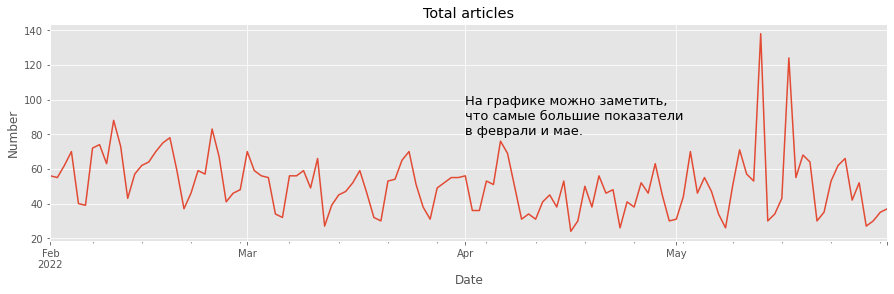

In [6]:
plt.figure(figsize=(15,4))
plt.title("Total articles")
plt.ylabel("Number")
plt.text('2022-04-1', 80, 'На графике можно заметить,\nчто самые большие показатели\nв феврали и мае.', fontsize = 13)

df_sports.append([df_us, df_world], sort = False).groupby(['Date']).count()['Title'].plot()
plt.show()

## **Теперь посмотрим количество публикаций, для каждой секции отдельно.**
### **World:**

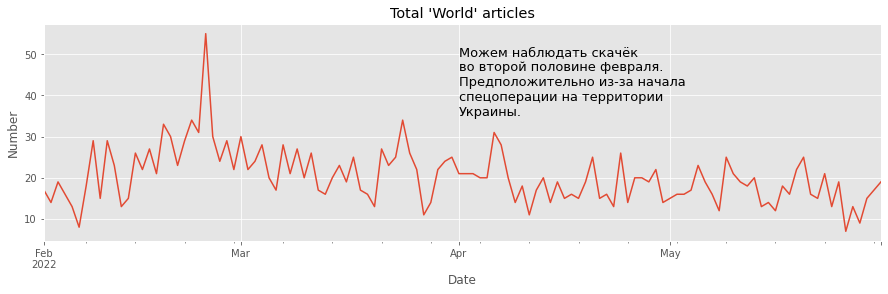

In [7]:
plt.figure(figsize=(15,4))
plt.title("Total 'World' articles")
plt.ylabel("Number")
plt.text('2022-04-01', 35, 'Можем наблюдать скачёк\nво второй половине февраля.\nПредположительно из-за начала\nспецоперации на территории\nУкраины.', fontsize = 13)

df_world.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить предположение, построим графики для 3 самых популярных категорий секции World:**

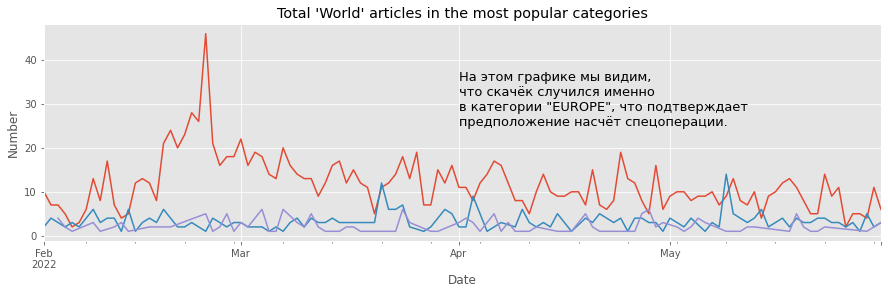

In [8]:
categories = df_world.groupby('Category', as_index=False).agg({'Title': 'count'})   \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'World' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-04-01', 25, 'На этом графике мы видим,\nчто скачёк случился именно\nв категории "EUROPE", что подтверждает\nпредположение насчёт спецоперации.', fontsize = 13)
    
for category in categories:
    df_world[df_world['Category']==category].groupby(['Date']).count()['Title'].plot()
    
plt.show()

### **U.S.:**

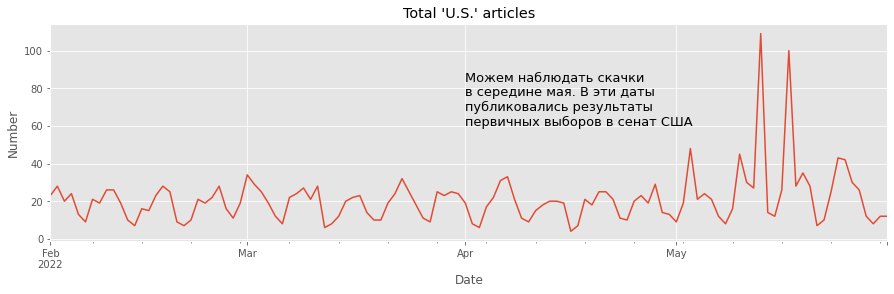

In [9]:
plt.figure(figsize=(15,4))
plt.title("Total 'U.S.' articles")
plt.ylabel("Number")
plt.text('2022-04-01', 60, 'Можем наблюдать скачки\nв середине мая. В эти даты\nпубликовались результаты\nпервичных выборов в сенат США', fontsize = 13)

df_us.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить предположение, построим графики для 3 самых популярных категорий секции U.S.:**

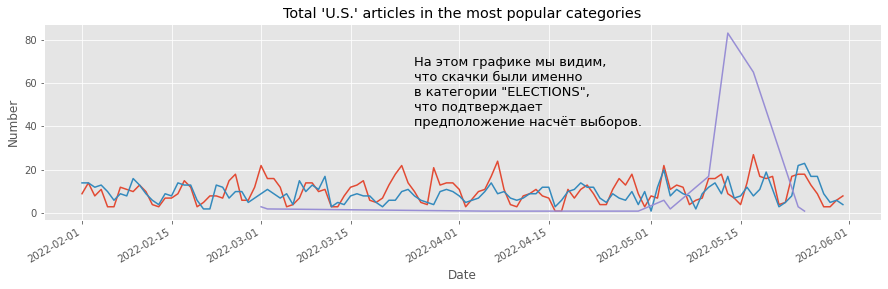

In [10]:
categories = df_us.groupby('Category', as_index=False).agg({'Title': 'count'}) \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'U.S.' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-03-25', 40, 'На этом графике мы видим,\nчто скачки были именно\nв категории "ELECTIONS",\nчто подтверждает\nпредположение насчёт выборов.', fontsize = 13)
    
for category in categories:
    df_us[df_us['Category']==category].groupby(['Date']).count()['Title'].plot()
    
plt.show()

### **Sports:**

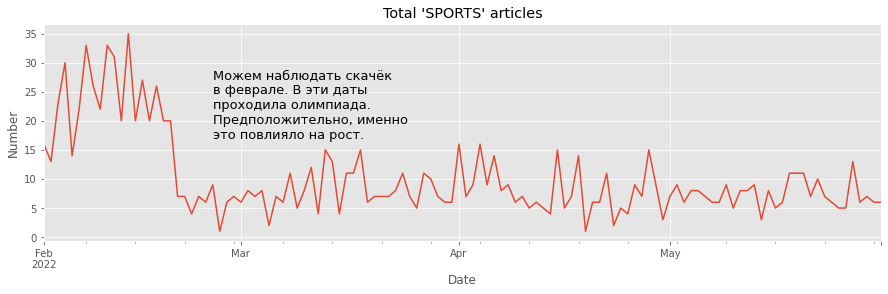

In [11]:
plt.figure(figsize=(15,4))
plt.title("Total 'SPORTS' articles")
plt.ylabel("Number")
plt.text('2022-02-25', 17, 'Можем наблюдать скачёк\nв феврале. В эти даты\nпроходила олимпиада.\nПредположительно, именно\nэто повлияло на рост.', fontsize = 13)

df_sports.groupby(['Date']).count()['Title'].plot()
plt.show()

### **Чтобы подтвердить предположение, построим графики для 3 самых популярных категорий секции Sports:**

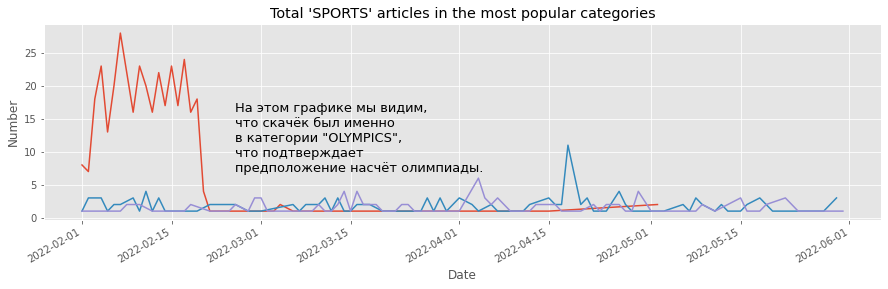

In [12]:
categories = df_sports.groupby('Category', as_index=False).agg({'Title': 'count'}) \
    .sort_values("Title", ascending = False)['Category'].head(3)

plt.figure(figsize=(15,4))
plt.title("Total 'SPORTS' articles in the most popular categories")
plt.ylabel("Number")
plt.text('2022-02-25', 7, 'На этом графике мы видим,\nчто скачёк был именно\nв категории "OLYMPICS",\nчто подтверждает\nпредположение насчёт олимпиады.', fontsize = 13)
    
for category in categories:
    df_sports[df_sports['Category']==category].groupby(['Date']).count()['Title'].plot()
    
plt.show()